First we do some imports

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

Then import all the parameters and equations


In [2]:
r = 0.05 #interest rate
mu = 0.02 #drift
sigma = 0.2 #diffusion
L = 1 #liquidation value
X_0 = 2 #initial dividend
alpha = 0.5 #investment scale
Inv = 2 #investment cost

beta1 = (sigma**2 / 2 - mu + sym.sqrt((mu - sigma**2 / 2)**2 + 2 * sigma**2 * r)) / sigma**2
beta2 = (sigma**2 / 2 - mu - sym.sqrt((mu - sigma**2 / 2)**2 + 2 * sigma**2 * r)) / sigma**2

x = sym.Symbol('x')

#computing Vhat, the value function after investment
xLprime = beta2 / (beta2 - 1) * L * (r - mu) / (1 + alpha)

Vhat = (1 + alpha) * x / (r - mu) + (x / xLprime)**beta2 * (L - (1 + alpha) * xLprime / (r - mu))

Vhatprime = (1 + alpha) / (r - mu) + beta2 * (x / xLprime)**beta2 / x * (L - (1 + alpha) * xLprime / (r - mu))

#computing xL, xH
xL = sym.Symbol('xL', real=True) #x lower bar
xH = sym.Symbol('xH', real=True) #x upper bar

VhatxH = (1 + alpha) * xH / (r - mu) + (xH / xLprime)**beta2 * (L - (1 + alpha) * xLprime / (r - mu))
VhatprimexH = (1 + alpha) / (r - mu) + beta2 * (xH / xLprime)**beta2 / xH * (L - (1 + alpha) * xLprime / (r - mu))

A2 = (VhatxH - Inv - VhatprimexH - (xH / xL)**beta2 * L) / ((1 - beta1) * (1 - (xH / xL)**(beta2 - beta1)))
A1 = (L - (VhatxH + Inv + VhatprimexH) * (xH / xL)**(-beta1)) / ((1 - beta2) * (1 - (xH / xL)**(beta2 - beta1)))

VxL = xL / (r - mu) + A1 + (xL / xH)**beta1 * A2 - L
VxH = xH / (r - mu) + (xH / xL)**beta2 * A1 + A2 - VhatxH + Inv

In [3]:
#now we try to solve xL, xH.
sol = sym.nsolve((VxL, VxH), (xL, xH), (X_0 / 2, X_0 * 2))

In [4]:
sol

Matrix([
[ 0.02023217158828 - 1.12587492006385e-31*I],
[0.890729905896305 - 2.51212977060925e-33*I]])

Wrap everything together

In [5]:
def boundary_computer(r=0.05, mu=0.02, sigma=0.2, L=1, X_0=2, alpha=0.5, Inv=2):
    beta1 = (sigma**2 / 2 - mu + sym.sqrt((mu - sigma**2 / 2)**2 + 2 * sigma**2 * r)) / sigma**2
    beta2 = (sigma**2 / 2 - mu - sym.sqrt((mu - sigma**2 / 2)**2 + 2 * sigma**2 * r)) / sigma**2

    xLprime = beta2 / (beta2 - 1) * L * (r - mu) / (1 + alpha)

    xL = sym.Symbol('xL', real=True)
    xH = sym.Symbol('xH', real=True)

    VhatxH = (1 + alpha) * xH / (r - mu) + (xH / xLprime)**beta2 * (L - (1 + alpha) * xLprime / (r - mu))
    VhatprimexH = (1 + alpha) / (r - mu) + beta2 * (xH / xLprime)**beta2 / xH * (L - (1 + alpha) * xLprime / (r - mu))

    A2 = (VhatxH - Inv - VhatprimexH - (xH / xL)**beta2 * L) / ((1 - beta1) * (1 - (xH / xL)**(beta2 - beta1)))
    A1 = (L - (VhatxH + Inv + VhatprimexH) * (xH / xL)**(-beta1)) / ((1 - beta2) * (1 - (xH / xL)**(beta2 - beta1)))

    VxL = xL / (r - mu) + A1 + (xL / xH)**beta1 * A2 - L
    VxH = xH / (r - mu) + (xH / xL)**beta2 * A1 + A2 - VhatxH + Inv

    sol = sym.nsolve((VxL, VxH), (xL, xH), (X_0 / 2, X_0 * 2))
    return sym.re(sol)


In [9]:
n = 20

#define the plot function
def plotCS(xL, xH, param, title, ax):
    ax.plot(param, xL, label="x lower boundary")
    ax.plot(param, xH, label="x upper boundary")
    ax.legend()
    ax.set_title(title)
    return ax

In [13]:
#change I first:
I = np.linspace(0, 4, n)
L = np.linspace(0, 2, n)
r = np.linspace(0.04, 0.06, n)
sigma = np.linspace(0.2, 0.4, n)
solxL = np.zeros(n)
solxH = np.zeros(n)

In [14]:
for i, Inv in enumerate(I):
    solxL[i], solxH[i] = boundary_computer(Inv=Inv)

<AxesSubplot:title={'center':'Changing sigma'}>

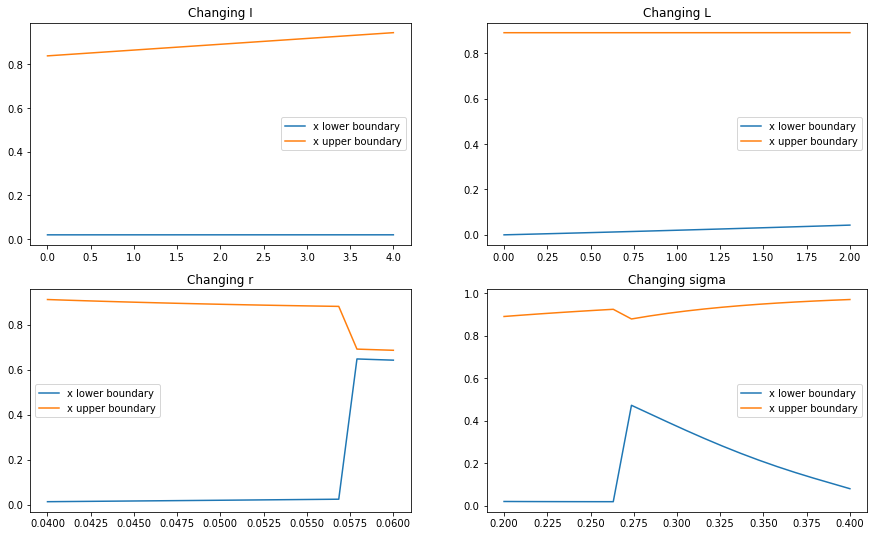

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
plotCS(solxL, solxH, I, "Changing I", axes[0, 0])
for i, Liq in enumerate(L):
    solxL[i], solxH[i] = boundary_computer(L=Liq)
plotCS(solxL, solxH, L, "Changing L", axes[0, 1])
for i, rate in enumerate(r):
    solxL[i], solxH[i] = boundary_computer(r=rate)
plotCS(solxL, solxH, r, "Changing r", axes[1, 0])
for i, vol in enumerate(sigma):
    solxL[i], solxH[i] = boundary_computer(sigma=vol)
plotCS(solxL, solxH, sigma, "Changing sigma", axes[1, 1])